In [103]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.optimize as spop

In [104]:
#importing data
tickers = ['BA', 'CVX', 'GS', 'ORCL', 'PEP', 'PFE']
start = '2015-12-31'
end = '2020-12-31'
prices_df = yf.download(' '.join(tickers), start, end)['Adj Close']
returns_df = prices_df.pct_change()[1:]

[*********************100%***********************]  6 of 6 completed


In [105]:
#calculating the return vector and the covariance matrix
cov = returns_df.cov()*252
r = np.array(((1+returns_df).prod())**(252/len(returns_df)) - 1)
e = np.ones(len(r))

In [106]:
#defining the investable universe
icov = np.linalg.inv(cov)
h = np.matmul(e, icov)
g = np.matmul(r, icov)
a = np.sum(e*h)
b = np.sum(e*g)
c = np.sum(r*g)
d = a*c - b**2

In [107]:
#minimum variance and tangency portfolio
mvp = h/a
mvp_return = b/a
mvp_risk = 1/a**(1/2)
tangency = g/b 
tangency_return = c/b
tangency_risk = c**(1/2)/b

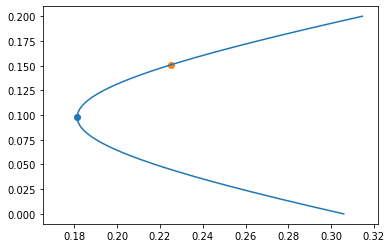

In [108]:
#plotting the efficient portfolio frontier
exp_returns = np.arange(0, 0.2001, 0.001)
risk = ((a*exp_returns**2 - 2*b*exp_returns + c)/d)**(1/2)
plt.scatter(mvp_risk, mvp_return)
plt.scatter(tangency_risk, tangency_return)
plt.plot(risk, exp_returns)

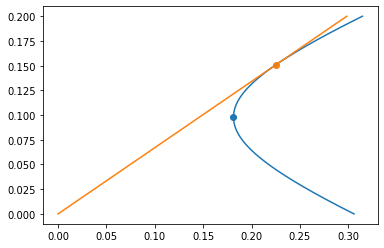

In [109]:
#plotting the securities market line
CAL_slope = 1/c**(1/2)
CAL_risk = exp_returns*CAL_slope
plt.plot(risk, exp_returns)
plt.plot(CAL_risk, exp_returns)
plt.scatter(mvp_risk, mvp_return)
plt.scatter(tangency_risk, tangency_return)

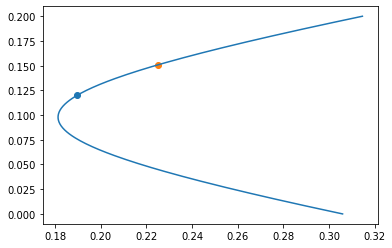

In [116]:
#solving the target return problem
target_return = 0.12
if target_return < mvp_return:
    optimal_portfolio = mvp
    optimal_return = mvp_return
    optimal_risk = mvp_risk
else:
    l = (c - b*target_return)/d
    m = (a*target_return - b)/d
    optimal_portfolio = l*h + m*g
    optimal_return = np.sum(optimal_portfolio*r)
    optimal_risk = ((a*optimal_return**2 - 2*b*optimal_return + c)/d)**(1/2)
plt.plot(risk, exp_returns)
plt.scatter(optimal_risk, optimal_return)
plt.scatter(tangency_risk, tangency_return)